In [74]:
import pandas as pd
import numpy as np
 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,8)


In [6]:
df = pd.read_csv(r"F:\data analysis\2nd project\movies.csv")

In [7]:
pd.set_option('display.max_rows',50)

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
for col in df.columns:
    missing_values=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_values*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [10]:
# noticing how many missied values  =  2171 !!!! oops 
np.random.seed(10)
df[df['budget'].isnull()].count()
# trying to generate smaple data from budget column
sample_data = df['budget'].dropna().sample(df['budget'].isnull().sum(), replace = True)
sample_data.index = df[df['budget'].isnull()].index
df.loc[df['budget'].isnull(), 'budget'] = sample_data

# Now all missed values are replaced with a Value from a Similar Distribution

In [11]:
# noticing how many missied values  =  189 !!!! oops 
df[df['gross'].isnull()].count()
df['gross'].describe()
#since values are few (2.5% only) then it's better to replace with the median
df['gross'].fillna(df['gross'].median(), inplace= True)


In [12]:
#changing types of ['budget', 'gross']
df[['budget', 'gross']] = df[['budget', 'gross']].astype('int64')

<Axes: >

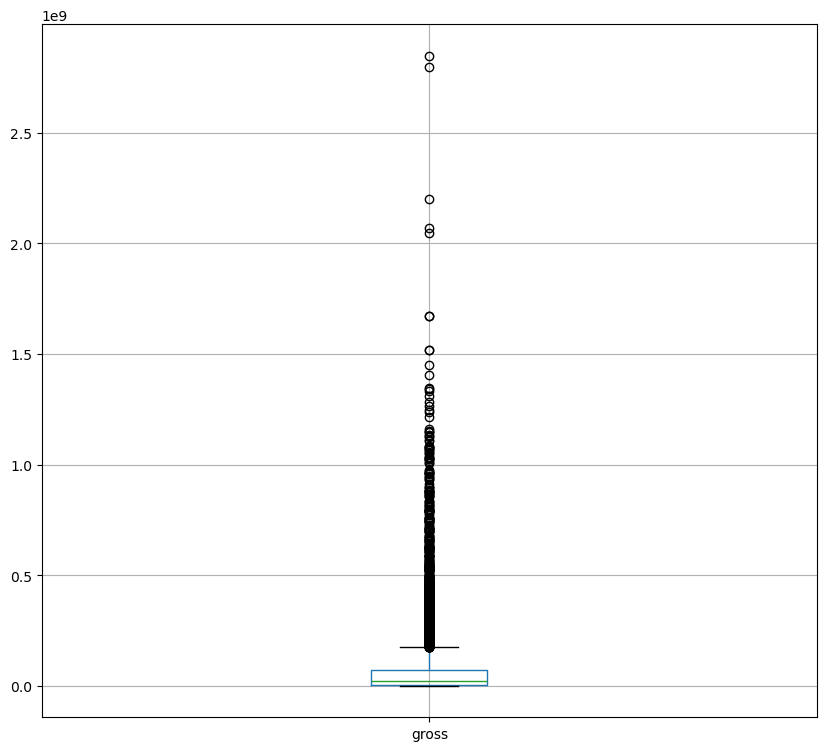

In [20]:
#next step is to analyse gross column
df['gross'].describe()
df.boxplot(column='gross')

count    7.668000e+03
mean     7.706370e+07
std      1.639191e+08
min      3.090000e+02
25%      4.681151e+06
50%      2.020576e+07
75%      7.262022e+07
max      2.847246e+09
Name: gross, dtype: float64

In [25]:
#checking if there are duplicates
df.drop_duplicates().sort_values(by='gross',ascending= False, inplace=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,130000000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,24000000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,10000000,682,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


Text(0, 0.5, 'Gross')

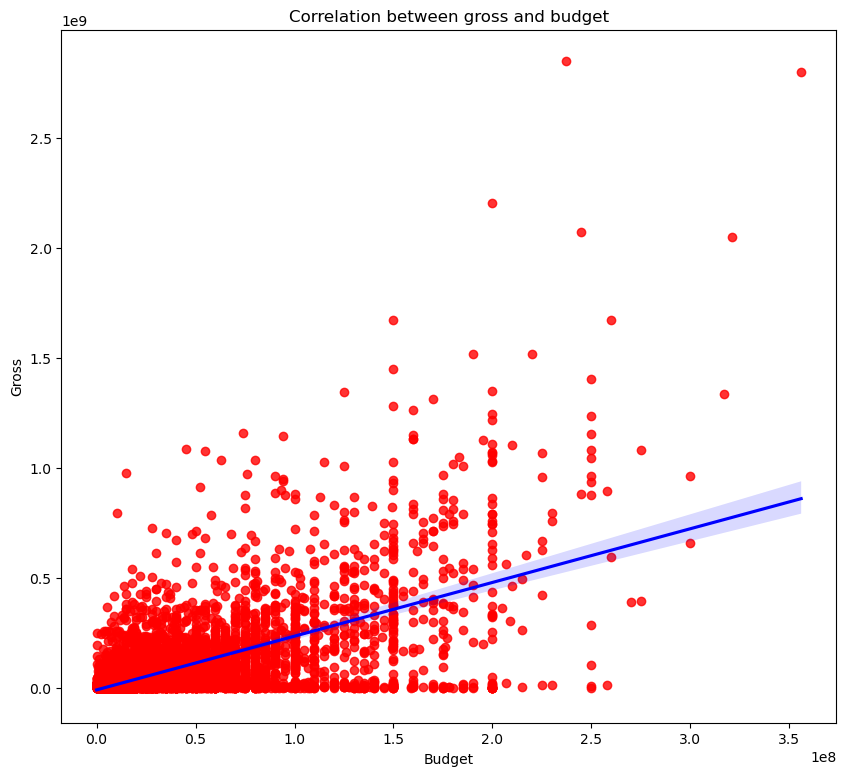

In [30]:
#w can deduce there is a positive relationshiop
sns.regplot(
x= 'budget',
y='gross',
data=df,
scatter_kws ={'color': 'red'},
line_kws={'color': 'blue'}
)
plt.title('Correlation between gross and budget')
plt.xlabel('Budget')
plt.ylabel('Gross')

In [65]:
int_list = []
for col in df.columns:
    if df[col].dtype != 'object':
      int_list.append(col)  

        
print(int_list)

    

['year', 'score', 'votes', 'budget', 'gross', 'runtime']


In [62]:
#Must fill all numeric values with something to apply corr()
df['votes'].fillna(df['votes'].median(),inplace=True)
df['runtime'].fillna(df['runtime'].median(),inplace=True)
df['score'].fillna(df['score'].median(),inplace=True)


In [76]:
corr_matrix= df[['year', 'score', 'votes', 'budget', 'gross', 'runtime']].corr()

<Axes: >

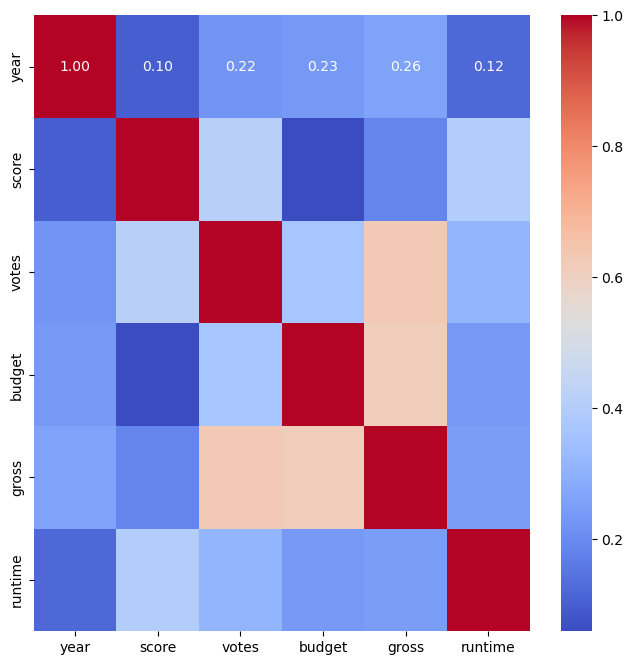

In [89]:
sns.heatmap(corr_matrix, annot= True, fmt='.2f',cmap="coolwarm", annot_kws={"size": 10})


In [92]:
df[['gross', 'budget']].corr()

,gross,budget
gross,1.000000,0.610399
budget,0.610399,1.000000


In [96]:
 df.apply(lambda x: x.factorize()[0] if x.dtype == 'object' else x)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,0,0,1980,0,8.4,927000.0,0,0,0,0,19000000,46998772,0,146.0
1,1,0,1,1980,1,5.8,65000.0,1,1,1,1,4500000,58853106,1,104.0
2,2,1,2,1980,2,8.7,1200000.0,2,2,2,1,18000000,538375067,2,124.0
3,3,1,3,1980,1,7.7,221000.0,3,3,3,1,3500000,83453539,3,88.0
4,4,0,3,1980,3,7.3,108000.0,4,4,4,1,6000000,39846344,4,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7507,-1,0,2020,3411,3.1,18.0,2944,4530,2810,1,7000,20205757,-1,90.0
7664,7508,-1,3,2020,3398,4.7,36.0,2945,4531,2795,1,12000000,20205757,2370,90.0
7665,7509,-1,0,2020,3412,5.7,29.0,2946,4532,2811,1,58750,20205757,2383,104.0
7666,7510,-1,0,2020,3405,6.5,33000.0,2947,4533,2812,1,15000,20205757,-1,120.0


In [86]:
my_full_matrix = df.apply(lambda x : x.factorize()[0]).corr()

<Axes: >

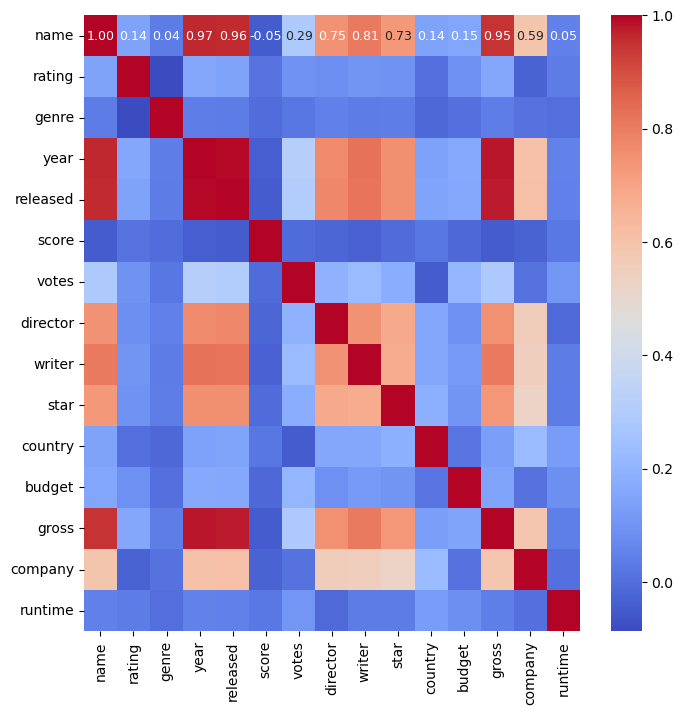

In [87]:
sns.heatmap(my_full_matrix, annot=True, fmt='.2f', annot_kws= {'size': 9},cmap= 'coolwarm')